<a href="https://colab.research.google.com/github/sneymz00/learn_IA/blob/main/ModeloDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Redes neuronales y Deep learning (Introducción)

In [ ]:
#Tensor Flow + Pytorch

In [6]:
import pandas as pd

datos = pd.read_csv('U6_01_celsius.csv')
datos.head()

celsius  fahrenheit
0      -40       -40.0
1      -10        14.0
2        0        32.0
3        8        46.4
4       15        59.0

In [3]:
import tensorflow as tf
import numpy as np

In [8]:
X = datos['celsius']
y = datos['fahrenheit']

In [9]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1]), #entrada es un dato
    tf.keras.layers.Dense(units=1, input_shape=[1]), #la salida es un dato
    ])


modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
train = modelo.fit(X, y, epochs=1000) #Optimizar 1000' vueltas hasta llegar al resultado optimo

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0018
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0017
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0017
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0016
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0016
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0016
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0015
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0015
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0015
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0014
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0014
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0014
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0013
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0013
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0013
Epoc

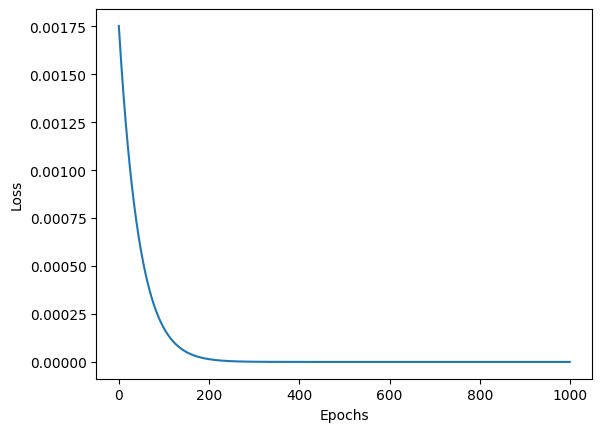

In [20]:
#Gráfica de error cuadratico medio
import matplotlib.pyplot as plt

plt.plot(train.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [28]:
predict = modelo.predict(np.array([[0]]))
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[31.99995]]


In [29]:
predict = modelo.predict(np.array([[100]]))
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[212.]]


#Red de clasificación

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [70]:
# Dividimos el split único en 90% train, 10% test
splits = ['train[:80%]', 'train[90%:]']

(data, raw_test), metadata = tfds.load(
    "cats_vs_dogs",
    split=splits,
    with_info=True,
    as_supervised=True  # devuelve (img, label)
)

In [68]:
metadata

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [69]:
data

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

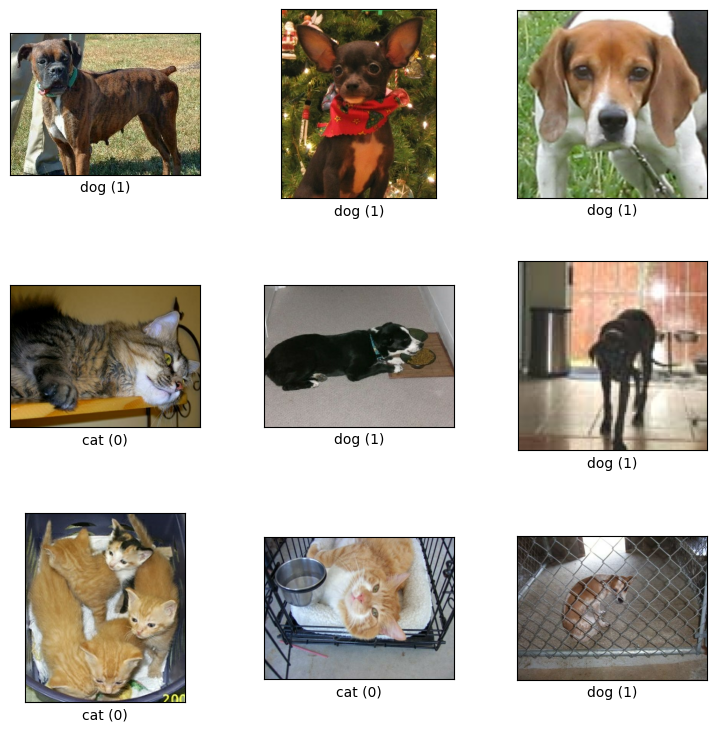

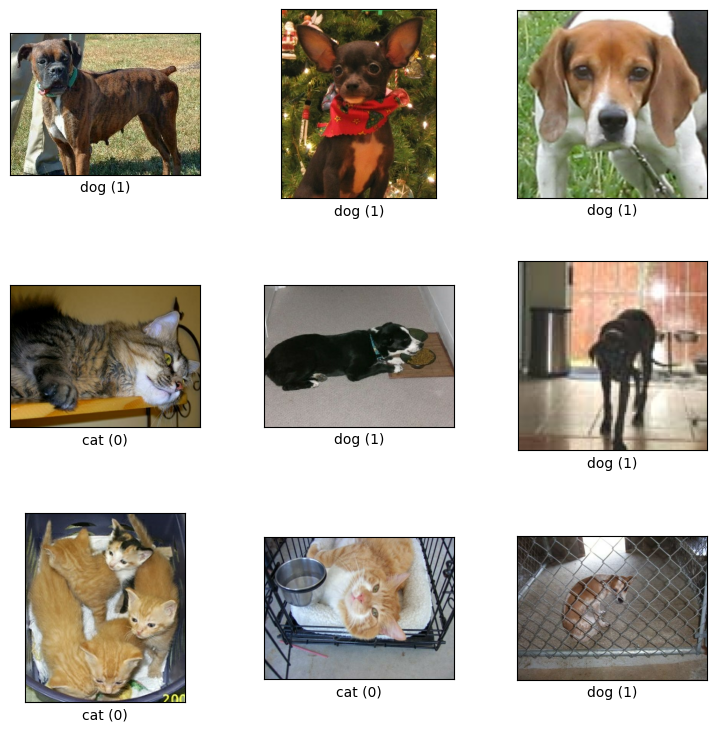

In [71]:
tfds.show_examples(data, metadata)

In [72]:
import cv2 #Modificar fotos
import matplotlib.pyplot as plt
import numpy as np

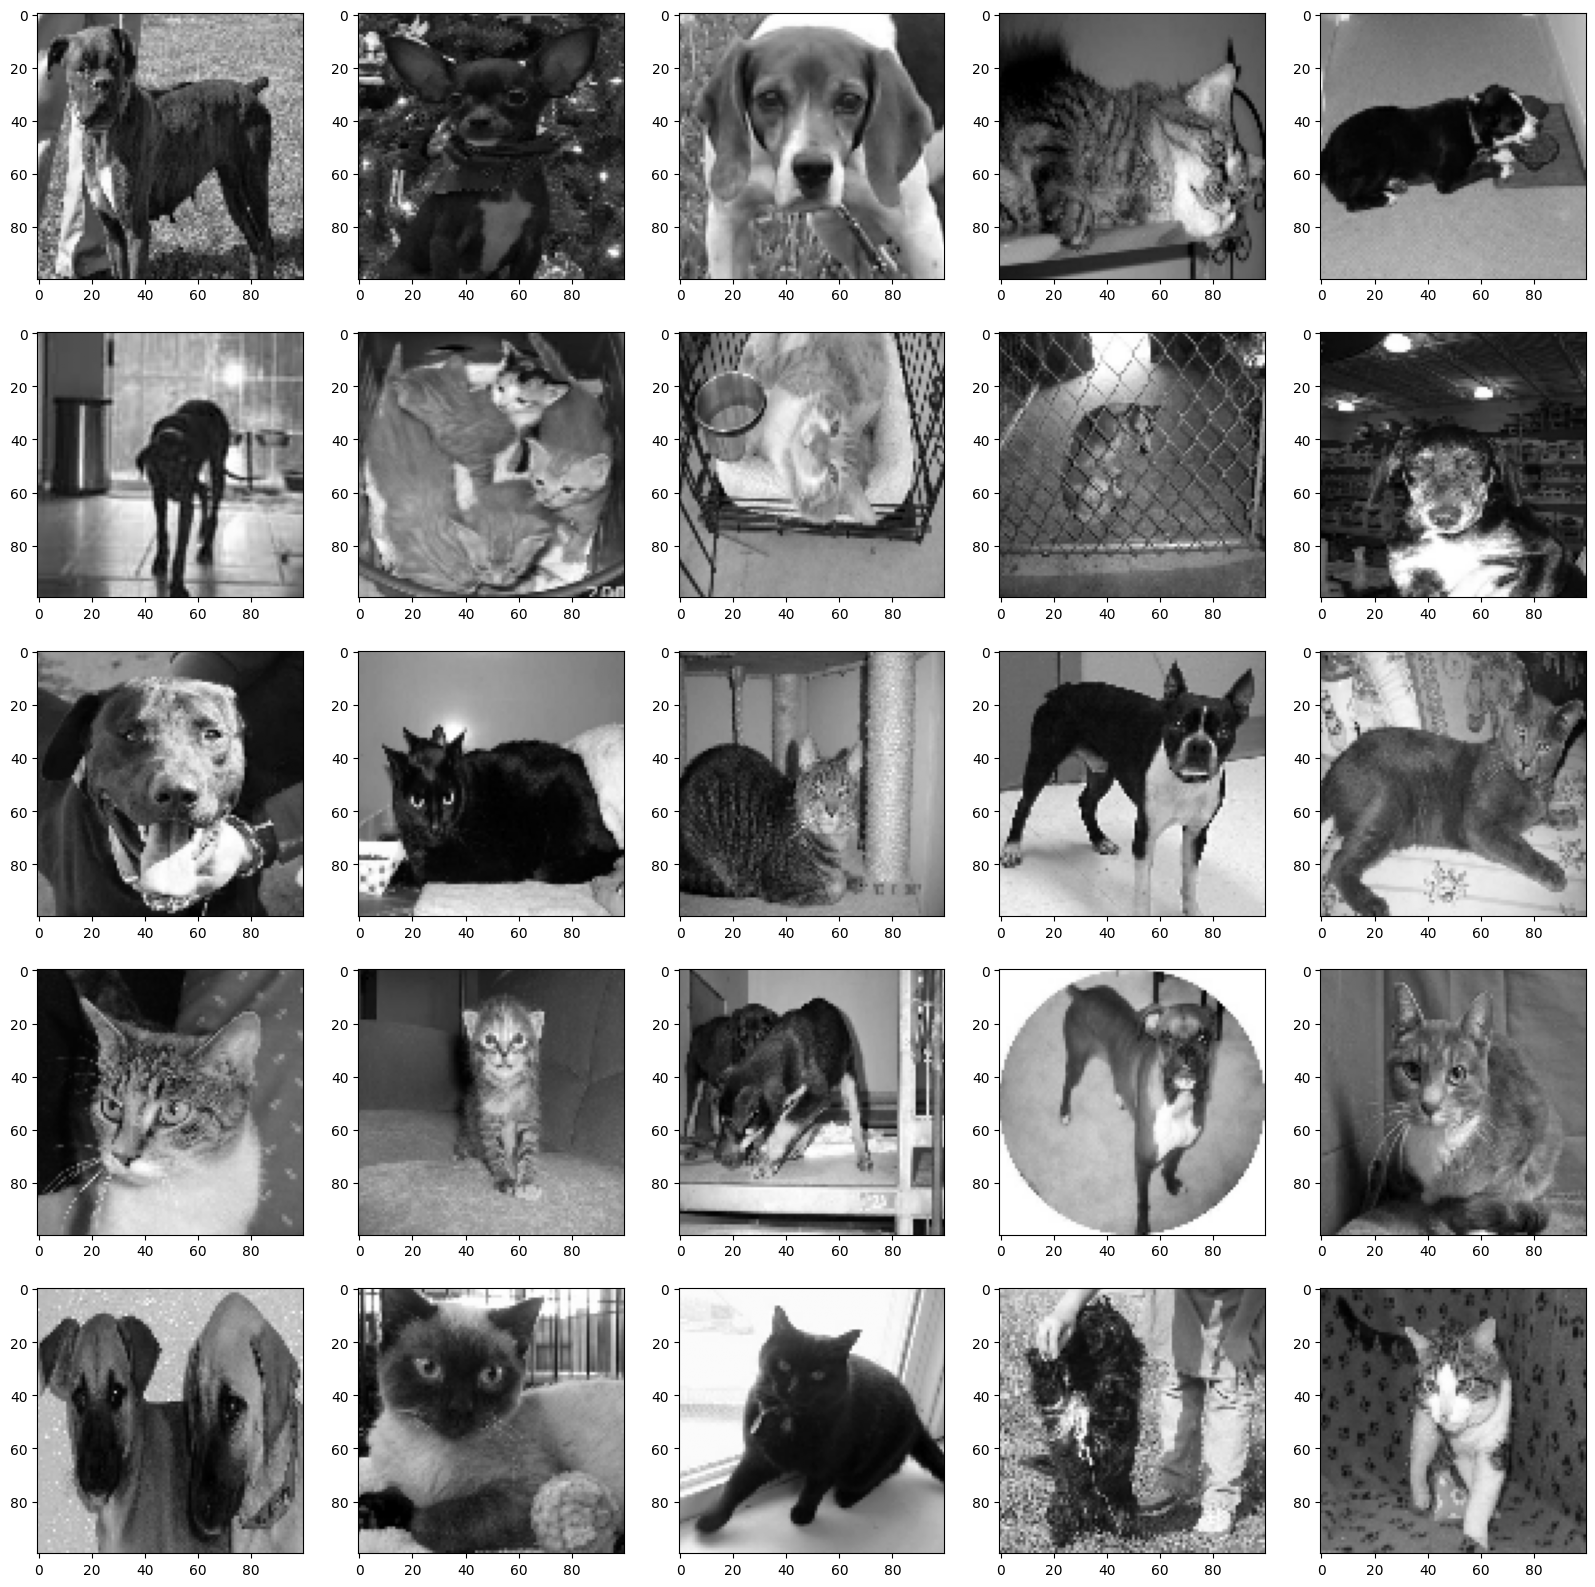

In [73]:
plt.figure(figsize=(20, 20))

size = 100

for i, (imagen, etiqueta) in enumerate(data.take(25)):
  imagen = cv2.resize(imagen.numpy(), (size, size))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  plt.subplot(5, 5, i+1)
  plt.imshow(imagen, cmap="gray")

Optimización de la imagen

In [86]:
train_data = []
for i, (imagen, etiqueta) in enumerate(data):
  imagen = cv2.resize(imagen.numpy(), (size, size))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(size, size, 1) #Optmización de pixeles
  train_data.append([imagen, etiqueta])

test_data = []
for i, (imagen, etiqueta) in enumerate(raw_test):
  imagen = cv2.resize(imagen.numpy(), (size, size))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
  imagen = imagen.reshape(size, size, 1) #Optmización de pixeles
  test_data.append([imagen, etiqueta])

In [75]:
len(train_data)

18610

In [76]:
#Preparar los datos para el entrenamiento
X = []
y = []

for imagen, etiqueta in train_data:
  X.append(imagen)
  y.append(etiqueta)

In [77]:
#Normalizamos los datos (0-1)
X = np.array(X).astype(float)/255 #Conversión del tipo y entre 255, para obtener valores entre 0 y 1
y = np.array(y) #perro vs gato (0 - 1)

In [78]:
print(y)

[1 1 1 ... 0 1 0]


In [79]:
#Entrenamiento del modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), #Establecemos diferentes filtros para optmizar el modelo

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    #Para clasificaciones binarias
    tf.keras.layers.Dense(1, activation='sigmoid') # Salida binaria
    ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [80]:
#Compilamos
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', #Compilación binaria
    metrics=['accuracy']
)

In [81]:
model.fit(
    X, y, batch_size=32,
    validation_split=0.15,
    epochs=50,
)

Epoch 1/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5290 - loss: 0.6901 - val_accuracy: 0.6203 - val_loss: 0.6397
Epoch 2/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6982 - loss: 0.5802 - val_accuracy: 0.7547 - val_loss: 0.4980
Epoch 3/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7757 - loss: 0.4707 - val_accuracy: 0.7862 - val_loss: 0.4583
Epoch 4/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8116 - loss: 0.4053 - val_accuracy: 0.8084 - val_loss: 0.4168
Epoch 5/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8389 - loss: 0.3628 - val_accuracy: 0.8095 - val_loss: 0.4106
Epoch 6/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8633 - loss: 0.3122 - val_accuracy: 0.8173 - val_loss: 0.4065
Epoch 7/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8846 - loss: 0.2769 - val_accuracy: 0.8234 - val_loss: 0.3975
Epoch 8/50
495/495 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9061 - loss: 0.2330 - val_acc

In [27]:
#Sobreajuste Over-fitting

#Dropout es una técnica que se emplea para desactivar aleatoreamente un porcentaje de las neuronas de las capas
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.4),  #  evita sobreajuste desactivando neuronas

    Dense(1, activation='sigmoid')  # salida binaria
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#Aumento de datos -> EJ: Misma foto transformada en diferentes formatos(volteada, invertida)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [28]:
#Volvemos a compilar y entrenar
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
model.fit(
    X, y, batch_size=32,
    validation_split=0.15,
    epochs=50,
)

Epoch 1/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5418 - loss: 0.6840 - val_accuracy: 0.6828 - val_loss: 0.5906
Epoch 2/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7204 - loss: 0.5546 - val_accuracy: 0.7662 - val_loss: 0.4828
Epoch 3/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7843 - loss: 0.4634 - val_accuracy: 0.7914 - val_loss: 0.4584
Epoch 4/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8151 - loss: 0.4065 - val_accuracy: 0.8350 - val_loss: 0.3935
Epoch 5/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8459 - loss: 0.3566 - val_accuracy: 0.8393 - val_loss: 0.3679
Epoch 6/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8699 - loss: 0.3068 - val_accuracy: 0.8049 - val_loss: 0.4592
Epoch 7/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8861 - loss: 0.2681 - val_accuracy: 0.8401 - val_loss: 0.4005
Epoch 8/50
618/618 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9139 - loss: 0.2131 - val_acc

##VISUALIZAMOS

In [47]:
class_names = metadata.features['label'].names
print(class_names)

['cat', 'dog']


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


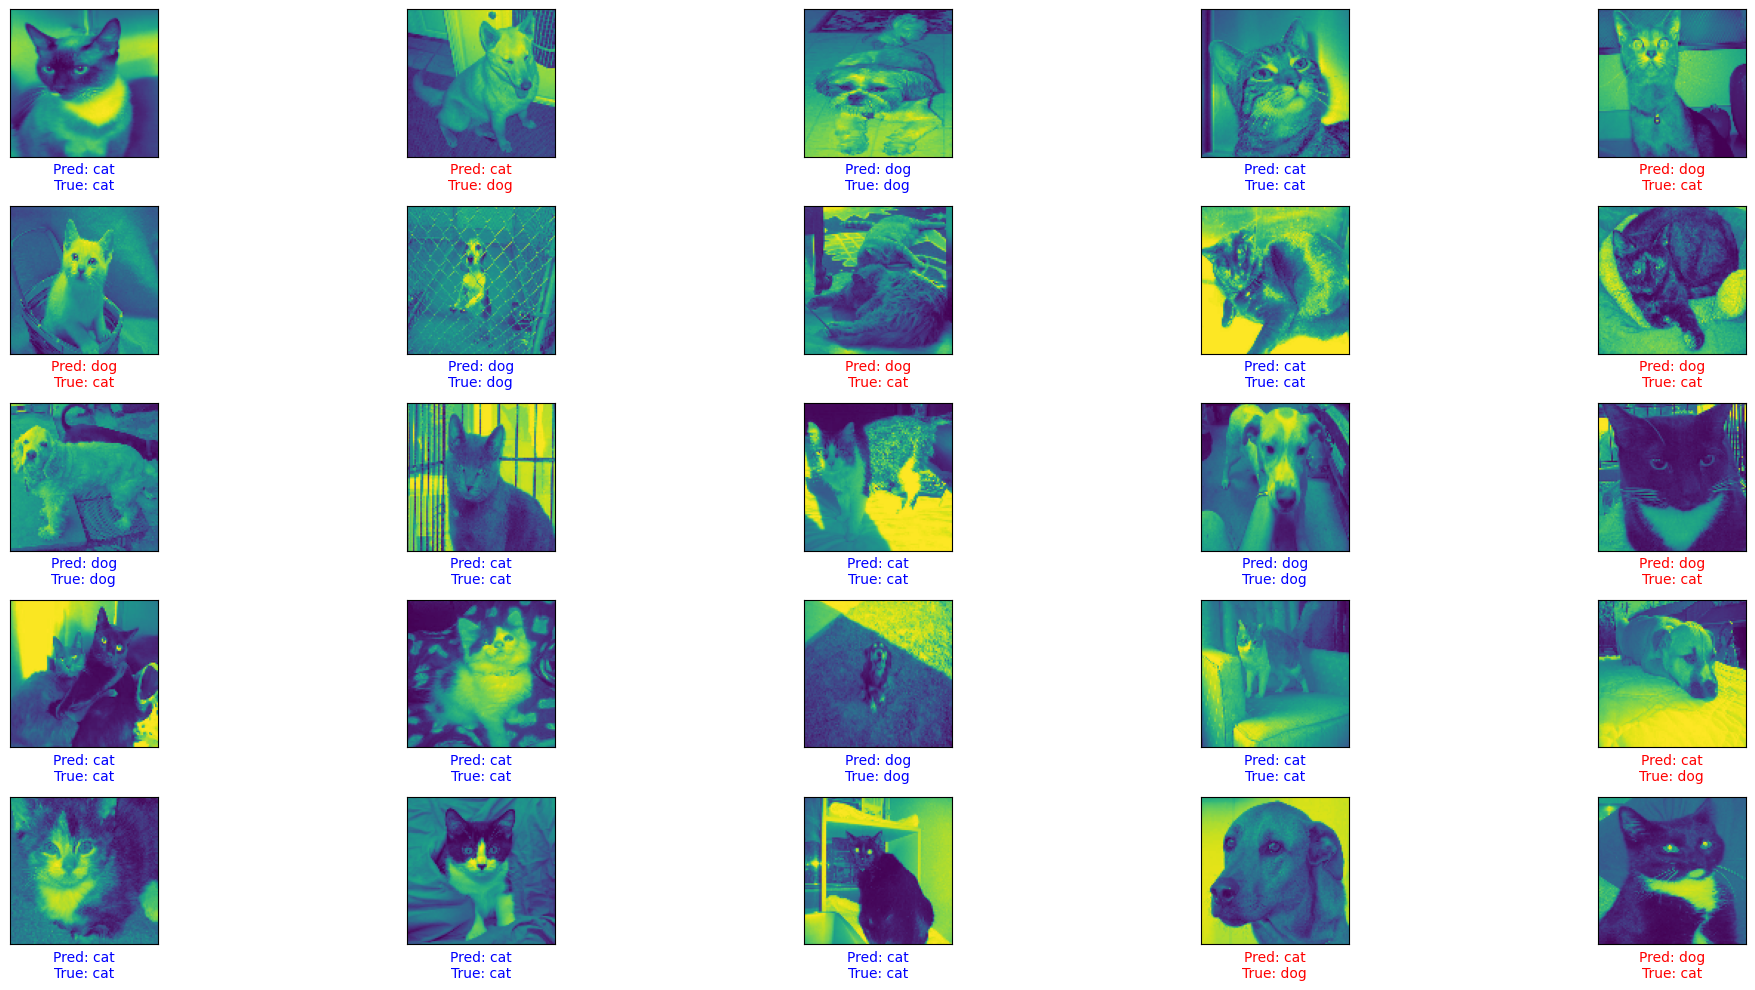

In [90]:
rows = 5
columns = 5
n_img = rows * columns

#Hemos ajustado las dimensiones antes, ahora volvemos a separar los valores en test
test_img = np.array([x[0] for x in test_data])
test_label = np.array([x[1] for x in test_data])
predict = model.predict(test_img)


# Dibujar imágenes con predicción
plt.figure(figsize=(2*2*columns, 2*rows))

for i in range(n_img):
    plt.subplot(rows, 2*columns, 2*i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_img[i])

    pred_label = 'dog' if predict[i] > 0.5 else 'cat'
    true_label = class_names[test_label[i]]
    color = 'blue' if pred_label == true_label else 'red'

    plt.xlabel(f"Pred: {pred_label}\nTrue: {true_label}", color=color)



plt.tight_layout()
plt.show()

# Empieza tú !!